# Titanic Dataset: Visualisation

In [1]:
# Importing necessary libraries
import pandas as pd

# Load the downloaded Titanic dataset
file_path = 'Titanic.csv'
titanic_data = pd.read_csv(file_path)

# Show the first few rows of the dataset to get an overview
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for missing values and data types of each column
import pandas as pd
missing_values = titanic_data.isnull().sum()
data_types = titanic_data.dtypes

missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
missing_values_df

,Missing Values,Data Type
PassengerId,0,int64
Survived,0,int64
Pclass,0,int64
Name,0,object
Sex,0,object
Age,177,float64
SibSp,0,int64
Parch,0,int64
Ticket,0,object
Fare,0,float64


In [5]:
# Fill missing values in the 'age' column with the median age
median_age = titanic_data['Age'].median()
titanic_data['Age'].fillna(median_age, inplace=True)

# Fill missing values in the 'embarked' column with the most frequent value
most_frequent_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Verify that there are no more missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
# Calculate basic statistical measures for the numerical columns
statistical_summary = titanic_data.describe()

statistical_summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


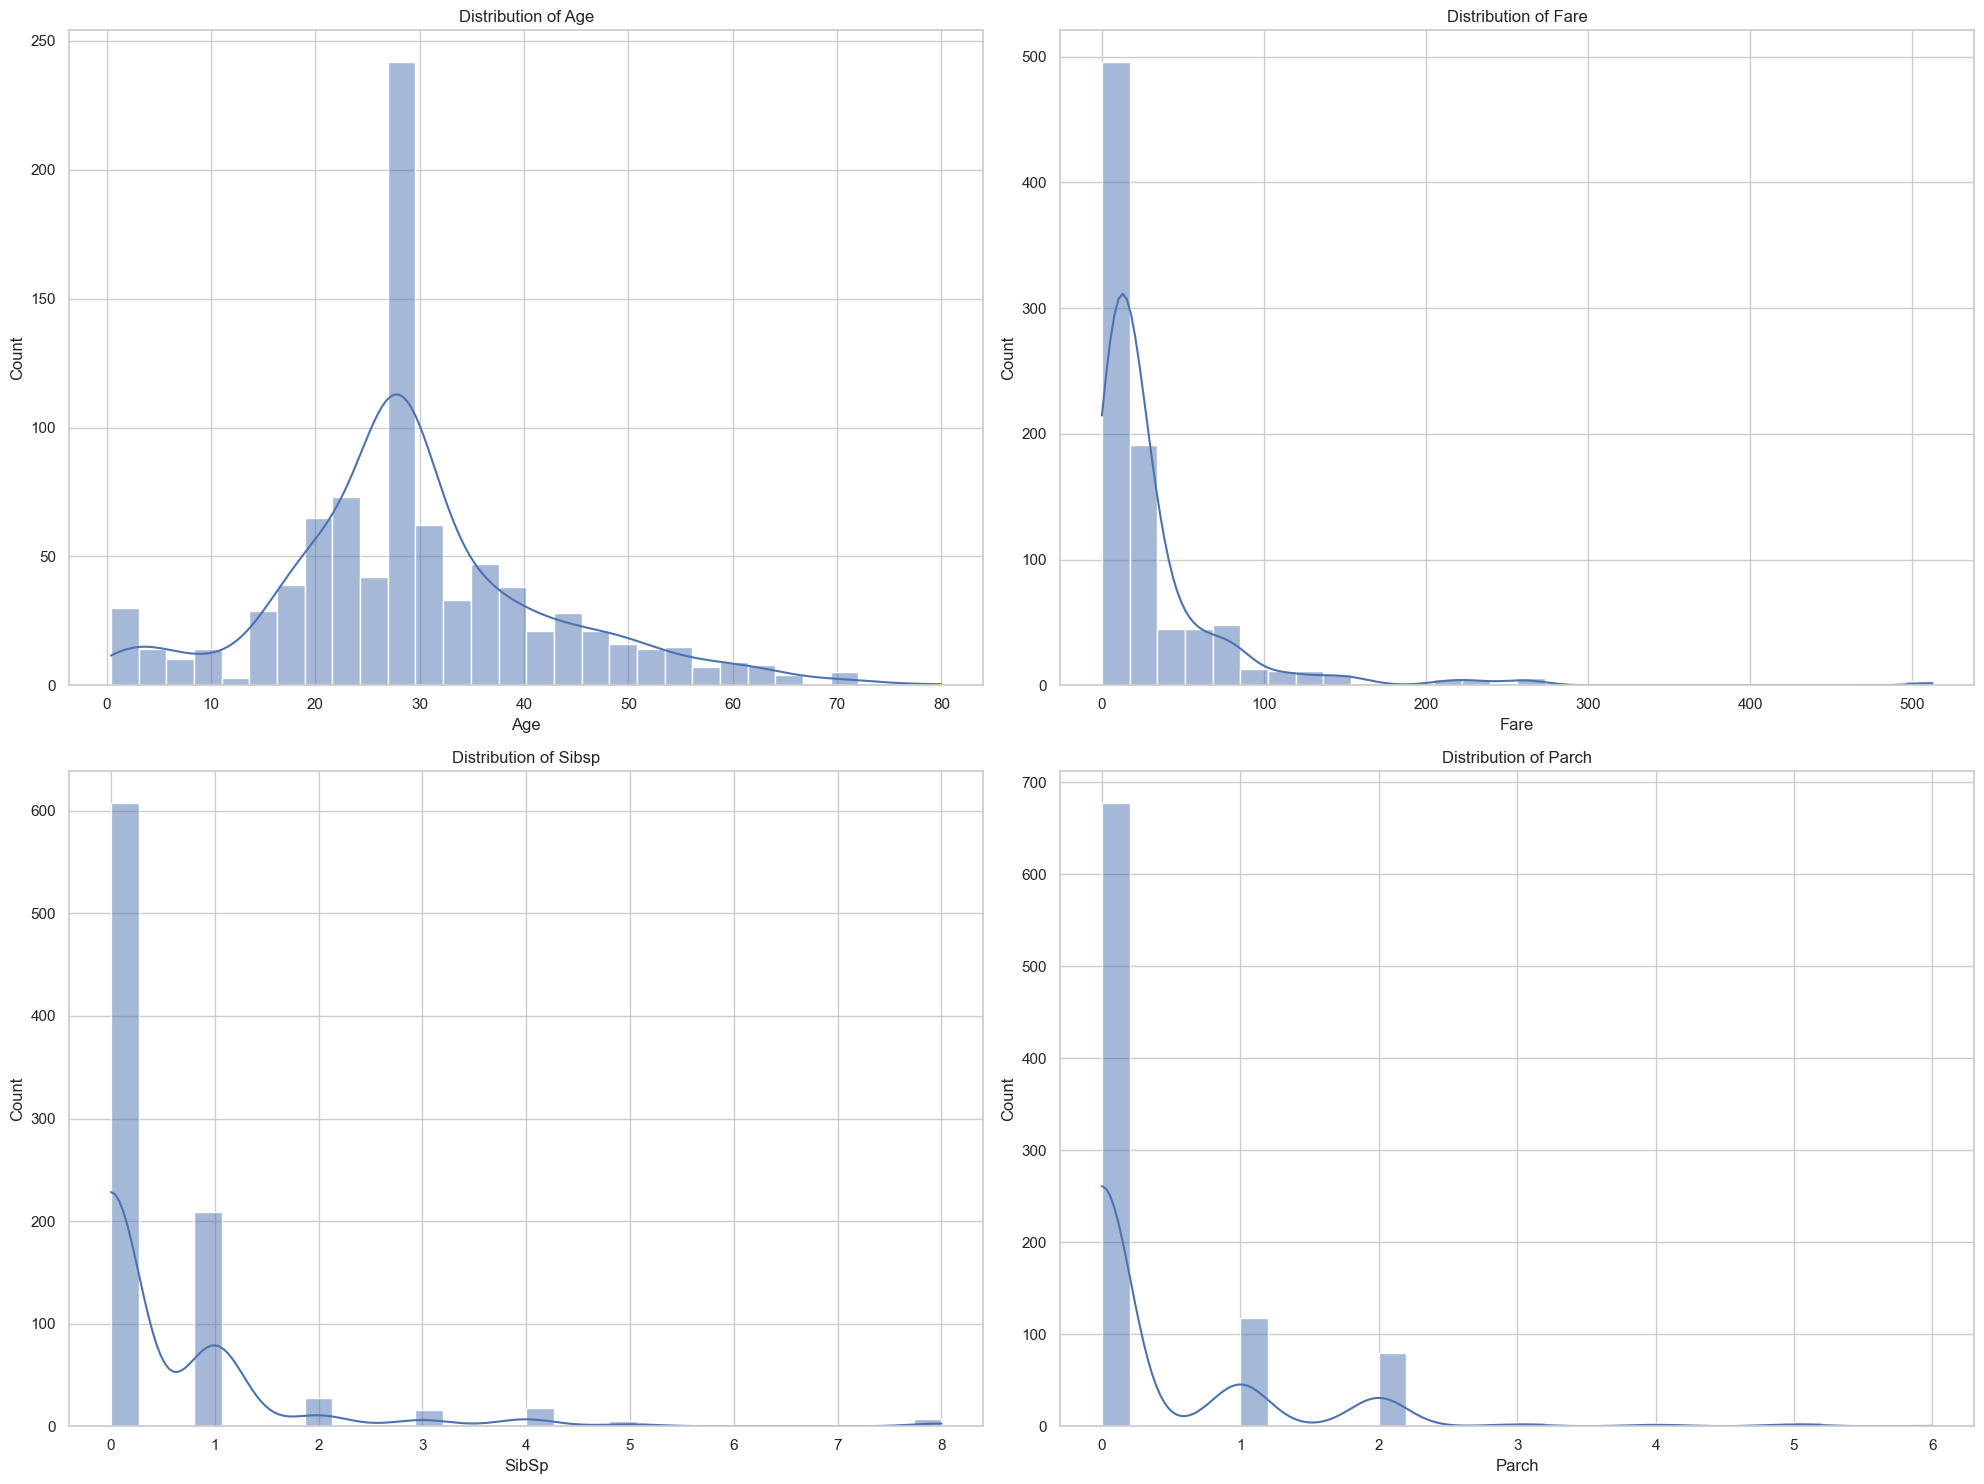

In [9]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualizations
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(titanic_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')

plt.tight_layout()
plt.show()

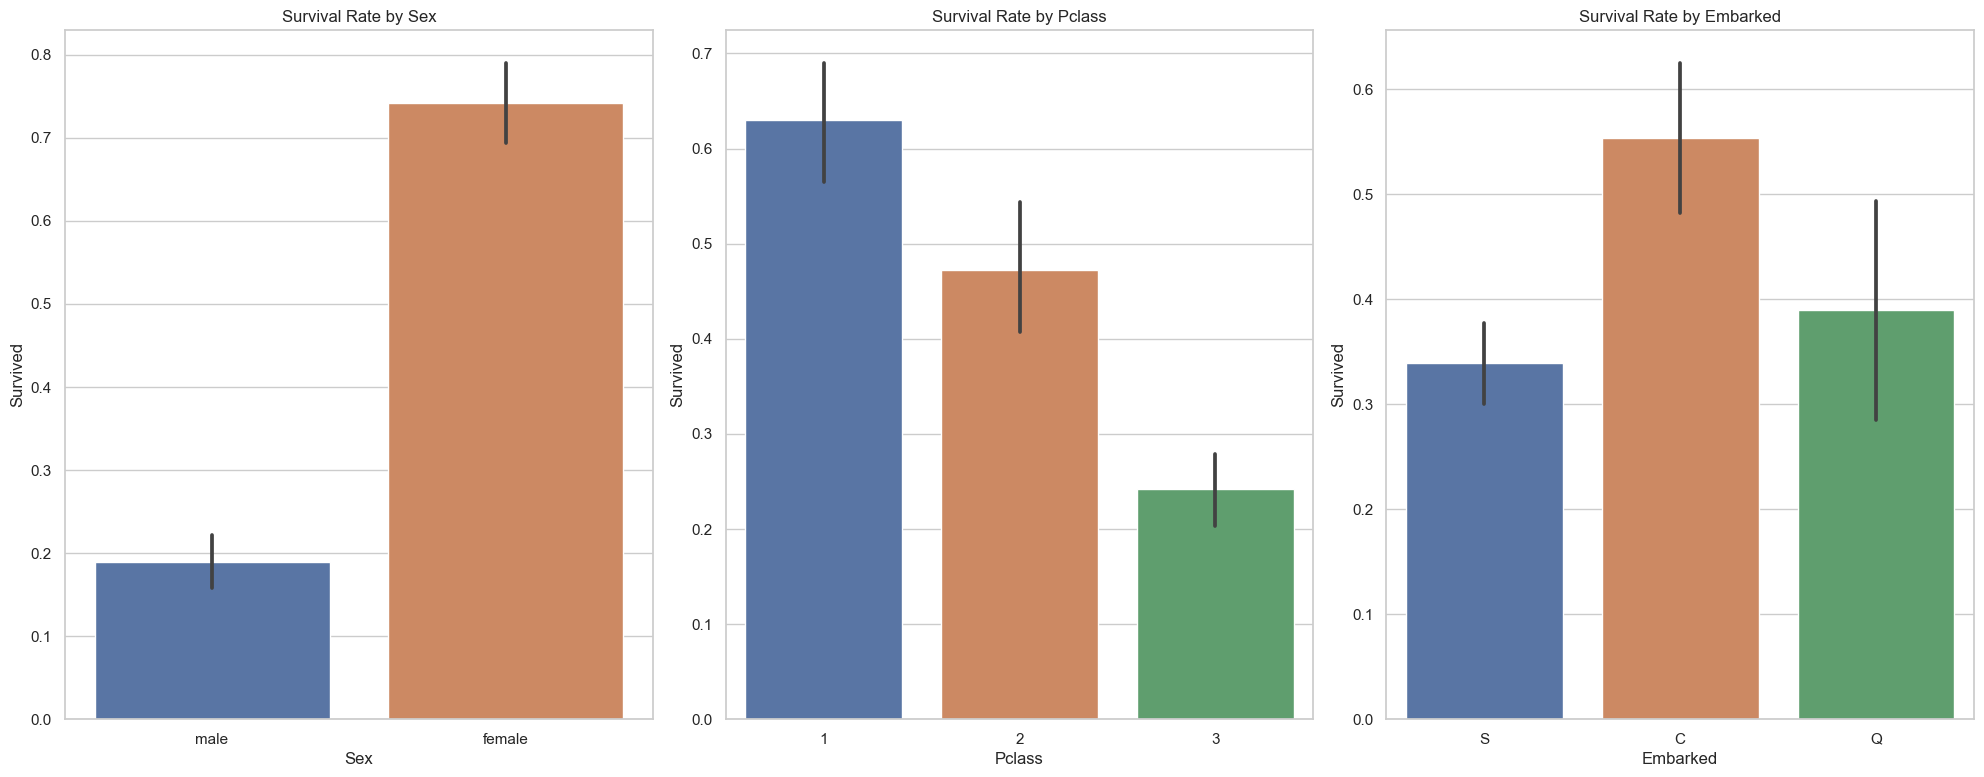

In [13]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of categorical features related to survival
categorical_features = ['Sex', 'Pclass', 'Embarked']

# Create subplots for each categorical feature vs survival
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=feature, y='Survived', data=titanic_data)
    plt.title(f'Survival Rate by {feature.capitalize()}')

plt.tight_layout()
plt.show()